# TD Wided Python 5 mai 21 
## fichier "Alliantz2" Ces donnés émanent de la société Allianz Global Investors et ses fournisseurs de recherche. 
### Ici on considèrera que le fournisseur en question est la banque US "Morgan Stanley" - Keep représente le vote 1 par approbation "oui" et 0 "non"

## Présentation des données
1.  La première colonne correspond au prénom du client
2.  la seconde colonne, au nombre de rendez vous en présentiel
3.  la troisième correspond au nombre de séminaires demandés
4.  la quatrième au nombre d emails échangés avec le client

### I Chargement des données

In [3]:
import os as os
import pandas as pd
datwi = pd.read_csv("C:/Users/ahwid/Desktop/Licence Pro Big Data/JulienBousquet_cours_R/Alliantz2.csv", sep=",")
print(datwi)

         prenoms  Conference.Call  Meeting  Conferences.seminars  Emails  Keep
0            Ali                0        0                     0       6     0
1        Andreas                1        1                     1       1     1
2        Andreas                0        0                     0       8     0
3          Brian                2        0                     1      39     1
4        Corynne                1        2                     0       2     1
5        Emilien                0        0                     0       1     0
6         Eoghan                0        0                     0       2     0
7           Eric                3        3                     1       0     1
8         Fabian                0        0                     0       7     0
9         Franck                0        1                     0      27     1
10      Francois                0        0                     0     135     1
11      Frederik                1        0          

In [5]:
datwi.head()

,prenoms,Conference.Call,Meeting,Conferences.seminars,Emails,Keep
0,Ali,0,0,0,6,0
1,Andreas,1,1,1,1,1
2,Andreas,0,0,0,8,0
3,Brian,2,0,1,39,1
4,Corynne,1,2,0,2,1


In [7]:
# Afficher les titres des colonnes
colnames = list(datwi.columns)
ncol = len(datwi.columns) # Nombre de colonnes
for i in range(ncol) :
    print(i,colnames[i])

0 prenoms
1 Conference.Call
2 Meeting
3 Conferences.seminars
4 Emails
5 Keep


### II Nettoyage des colonnes

In [11]:
#renommer la colonne 1, 3 & 5
colnames  = list(datwi.columns); colnames[1] = "Confcalls"; datwi.columns = colnames
colnames  = list(datwi.columns); colnames[3] = "Séminaires"; datwi.columns = colnames
colnames  = list(datwi.columns); colnames[5] = "Approbation"; datwi.columns = colnames
datwi.head()

,prenoms,Confcalls,Meeting,Séminaires,Emails,Approbation
0,Ali,0,0,0,6,0
1,Andreas,1,1,1,1,1
2,Andreas,0,0,0,8,0
3,Brian,2,0,1,39,1
4,Corynne,1,2,0,2,1


In [25]:
#Définition des variables d'input et de target
inputs = datwi.drop('Approbation',axis='columns')
target = datwi['Approbation']
#checker avec
#target
#ou 
#inputs

In [28]:
#convertir la colonne des "prenoms" pour le MachineLearning puisse travailler avec des nombres
from sklearn.preprocessing import LabelEncoder
prenoms = LabelEncoder()
#créer une extra colonne dans mon df, avec la méthode fit_transform que je vais appeler
inputs['prenoms_n'] = prenoms.fit_transform(inputs['prenoms'])
inputs.head()

,prenoms,Confcalls,Meeting,Séminaires,Emails,prenoms_n
0,Ali,0,0,0,6,1
1,Andreas,1,1,1,1,3
2,Andreas,0,0,0,8,3
3,Brian,2,0,1,39,6
4,Corynne,1,2,0,2,8


In [33]:
#je supprime et reconverti la colonne prénoms avec un entier pour que le sklearn puisse travailler 
inputs_n = inputs.drop(['prenoms'],axis='columns')
inputs_n #check

,Confcalls,Meeting,Séminaires,Emails,prenoms_n
0,0,0,0,6,1
1,1,1,1,1,3
2,0,0,0,8,3
3,2,0,1,39,6
4,1,2,0,2,8
5,0,0,0,1,10
6,0,0,0,2,11
7,3,3,1,0,12
8,0,0,0,7,13
9,0,1,0,27,15


### III Entraîner son modèle avec la classification

In [34]:
# j'importe l'arbre depuis la librairie sklearn
from sklearn import tree
model = tree.DecisionTreeClassifier()
#entraîner son modèle
model.fit(inputs_n, target)

DecisionTreeClassifier()

### iV Analyse des données

In [36]:
#score prédiction
model.score(inputs_n,target) #le score =1 (précision parfaite/jeu de données simple) parce que j'utilise le même jeu de données (que j'ai utilisé pour l'entraînement)

1.0

### Question et prédiction : Est ce que les collègues qui échangent régulièrement des emails avec Morgan Stanley sont plus enclin à voter OUI pour garder ce fournisseur sur la liste l'année prochaine?

In [45]:
model.predict([[2,0,1,39,6]]) #récupération de la ligne correspondant aux échanges d'emails nombreux - ICI ligne 3 
#échanges de 39 emails

array([1], dtype=int64)

In [46]:
model.predict([[0,0,0,135,16]]) #ligne 10 échanges de 135 emails

array([1], dtype=int64)

In [47]:
model.predict([[5,8,1,92,54]]) #ligne 28 échanges de 92 emails

array([1], dtype=int64)

In [48]:
model.predict([[0,0,0,69,40]]) #ligne 50 échanges de 2 emails

array([1], dtype=int64)

#### ==> Le résultat (= 1) indique que les collègues qui ont le plus d'échanges par email auraient tendance à vouloir conserver le fournisseur en question

### V Représenter dans une graphique à  2 dimensions les votes des collègues en fonction du nombre de séminaires attendus (1) ou du nombre d'échanges d'emails (2)
axe x
axe y 
points rouge non
points verts oui
Faire afficher leurs prénoms dans le graphique

### Visu globale du jeu de données

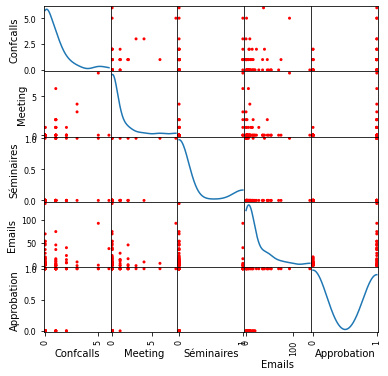

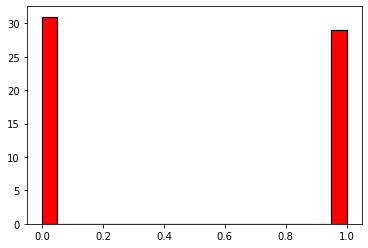

In [51]:
import matplotlib.pyplot as plt #matplotlib pour visualiser les images
from pandas.plotting import scatter_matrix
scatter_matrix(datwi.iloc[:,1:7], alpha = 1, figsize = (6, 6), diagonal = 'kde',color="red")
plt.show() # On voit que les variables discrètes sont éliminées
# hist : histogramme de satisfaction
plt.hist(datwi.Approbation,color="red",edgecolor='black', linewidth=1.2,bins=20) 
plt.show()

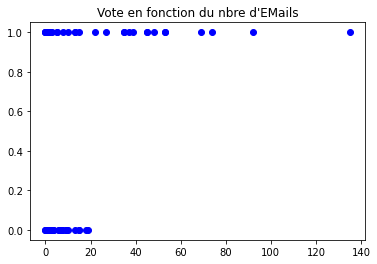

In [89]:
import os as os
import pandas as pd
datwi = pd.read_csv("C:/Users/ahwid/Desktop/Licence Pro Big Data/JulienBousquet_cours_R/Alliantz2.csv", sep=",")
import matplotlib.pyplot as plt
plt.title("Vote en fonction du nbre d'EMails")
plt.plot(datwi.loc[:,"Emails"], datwi.loc[:,"Keep"], "ob") # ob = type de points "o" ronds, "b" bleus #colonne 4 Emails, colonne 5 Approbation
plt.show() # Visualiser le graphique

### Classification en fonction des Emails et Seminaires

In [94]:
#from sklearn.datasets import load_datwi
datwi = pd.read_csv("C:/Users/ahwid/Desktop/Licence Pro Big Data/JulienBousquet_cours_R/Alliantz2.csv", sep=",")

datwi, Keep = datwi(return_X_y=True, as_frame=True) #X nos données et y ce qu'on cherche à prédir
from matplotlib import pyplot as plt #matplotlib pour visualiser les images
plt.scatter(datwi.iloc[:,0], datwi.iloc[:,1], c=list(Approbation)) #iloc permet de pointer vers une donnée à modifier (offset)
#iloc = i comme "integer" car un offset c'est toujours un entier
plt.xlabel("Emails")
plt.ylabel("Conferences.seminars")
datwi

TypeError: 'DataFrame' object is not callable

In [60]:
# chargeons le décision tree classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(min_samples_leaf=5, 
                              max_depth=2) #instanciation
#ajustement et apprentissage = "FIT" sur les données datwi = Apprentissage Automatique (MachineLearning)- entraîner le modèle
tree.fit(datwi, Approbation) 

# prédiction
tree.predict(datwi)#retrouve la catégorie d'approbation '1' ou '0'

NameError: name 'Approbation' is not defined

In [61]:
tree.score(datwi, Approbation) #%age de réussite

NameError: name 'Approbation' is not defined

### Réprésentation de l'arbre de décision

In [63]:
#1) export en graphviz
from sklearn.tree import export_graphviz
export_graphviz(tree, # l'arbre à exporter
                out_file='arbre.dot', # le nom du fichier
                label='root',# que sur le noeud de début
                class_names=['0','1'],
                feature_names=datwi.columns,
                impurity=False
               )
#2) Il faut transformer notre fichier . dot en image
#2a. Charger le logiciel graphviz : cf google
#2a' : vérifier que ça fonctionne.

#2. Il faut actionner la conversion
import os
cwd = os.getcwd()
exe = exe = "C:\\Program Files\\Graphviz\\bin\\dot.exe" #l'adresse du fichier graphviz.exe dans l'arborescence
print(cwd)
print(exe)
# Construisons la commande de lancement de graphviz
cmd = '"{0}" -Tpng {1}\\arbre.dot -o {1}\\arbre.png'.format(exe,cwd) #cwd=courant directory
print(cmd)
os.system(cmd)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.